# В этом ноутбуке быстро пройдемся по всем фичам, и отберем нужные, самые интересные для нас

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()
plt.rcParams["figure.figsize"] = (16, 8)

In [3]:
path = "../parsers/mvideo_parser/unfiltered_features.parquet"

In [4]:
df = pd.read_parquet(path, engine="pyarrow")

# Восстановим набор подготовленный в первом ноутубуке

In [44]:
def convert_volume_to_number(val):
    if not val:
        return 0
    num, item = val.split()
    num = int(num)
    if item.lower() == "тб":
        return 1024 * num
    else:
        return num
    
def prepare_df_1(df_origin):
    df = df_origin.copy()
    useful_features = set()
    
    df["basePriceLog"] = np.log1p(df.basePrice)
    
    useful_features.update(["basePriceLog"])
    
    df["Процессор_Процессор_crop"] = df["Процессор_Процессор"].apply(lambda x:" ".join(x.split()[:2]))
    df.loc[((df["Серия модели_Серия"] == "MacBook Pro") | ((df["Серия модели_Серия"] == "MacBook Pro Touch Bar"))) & (df["Процессор_Количество ядер"].isna()), "Процессор_Количество ядер"] = 10

    useful_features.update([
        "brand_name",
        "Заводские данные_Гарантия",
        "Заводские данные_Страна",
        "Операционная система_Операционная система",
        "Процессор_Процессор_crop",
        "Процессор_Количество ядер"
    ])
    
    df["Видеокарта_Графический контроллер_crop"] = df["Видеокарта_Графический контроллер"].fillna("").apply(lambda x:" ".join(x.split()[:2]))
    df["Жесткий диск_Объем SSD_num"] = df["Жесткий диск_Объем SSD"].apply(convert_volume_to_number)
    df["Экран_Диагональ экрана_num"] = df["Экран_Диагональ экрана"].fillna("").apply(lambda x: 15.6 if x == "" else float(x.split('"')[0]))
    
    useful_features.update([
        "Видеокарта_Графический контроллер_crop",
        "Видеокарта_Производитель видеопроцессора",
        "Экран_Диагональ экрана_num",
        "Оперативная память_Оперативная память (RAM)",
        "Жесткий диск_Объем SSD_num",
        "Экран_Частота обновления",
        "Оперативная память_Частота памяти"
    ])

    df["Безопасность_Датчик отпечатков пальцев_crop"] = ~df["Безопасность_Датчик отпечатков пальцев"].isna()
    df["Корпус_Материал корпуса_металл"] = df["Корпус_Материал корпуса"].str.contains("алюмин|металл|сплав|магний")
    df["Корпус_Материал корпуса_пластик"] = df["Корпус_Материал корпуса"].str.contains("пластик|углерод|поликарб")
    
    useful_features.update([
        "Безопасность_Датчик отпечатков пальцев_crop",
        "Корпус_Материал корпуса_металл",
        "Корпус_Материал корпуса_пластик"
    ])
    
    return df[list(useful_features)]
    

In [45]:
prepare_df_1(df)

,Видеокарта_Графический контроллер_crop,brand_name,Заводские данные_Страна,Видеокарта_Производитель видеопроцессора,Оперативная память_Оперативная память (RAM),Корпус_Материал корпуса_металл,Корпус_Материал корпуса_пластик,Операционная система_Операционная система,Процессор_Процессор_crop,Заводские данные_Гарантия,Безопасность_Датчик отпечатков пальцев_crop,Экран_Частота обновления,basePriceLog,Жесткий диск_Объем SSD_num,Экран_Диагональ экрана_num,Оперативная память_Частота памяти,Процессор_Количество ядер
30062056,Intel UHD,Honor,Китай,Intel,16,True,False,Windows 10 Домашняя 64,Intel Core,1 год,True,60.0,11.156251,512,15.6,2666.0,4.0
30065211,GeForce RTX,Thunderobot,Китай,NVIDIA,16,False,True,Windows 11 Pro 64,Intel Core,1 год,False,144.0,11.561716,512,17.3,3200.0,8.0
30056687,Intel UHD,Honor,Китай,Intel,8,True,False,Windows 10 Домашняя 64,Intel Core,1 год,True,60.0,11.002100,512,15.6,2400.0,4.0
30064594,,Apple,Китай,None,8,True,False,macOS,Apple M2,1 год,False,NaN,11.849398,256,15.6,NaN,8.0
30061606,GeForce RTX,MSI,Китай,NVIDIA,16,True,True,Windows 11 Домашняя 64,Intel Core,1 год,False,144.0,11.775290,512,17.3,3200.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400027919,интегрированная,Apple,Китай,None,8,True,False,macOS Monterey,Apple M2,1 год,True,60.0,11.820344,256,15.6,NaN,8.0
4183550,Intel HD,Echips,Китай,Intel,8,False,True,Windows 10 Домашняя,Intel Celeron,1 год,False,60.0,10.239638,240,15.6,NaN,4.0
400027896,интегрированная,Apple,Китай,None,16,True,False,macOS Monterey,Apple M1,1 год,True,60.0,12.128062,512,15.6,NaN,10.0
400029644,интегрированная,Apple,Китай,None,16,True,False,macOS Monterey,Apple M1,1 год,True,60.0,12.128062,512,15.6,NaN,10.0


# Колонки 31-50

In [14]:
useful_features = set()

In [7]:
current_features = df.columns[30:50]

In [8]:
df[current_features]

,Цвет_Цвет,Габаритные размеры_Габаритные размеры (В*Ш*Г),Габаритные размеры_Высота,Габаритные размеры_Ширина,Габаритные размеры_Глубина,Заводские данные_Гарантия предоставляется,Интерфейсы_Порт USB 2.0 тип A,Интерфейсы_Порт USB 3.2 тип A,Вес_Вес,Оперативная память_Максимальная оперативная память,Серия модели_Модель,Экран_Тип дисплея Mac,Клавиатура_Подсветка клавиш,Клавиатура_Панель Touch Bar,Звук_Количество встроенных динамиков,Звук_Звуковая система,Интерфейсы_Разъем для наушников 3.5 мм,Интерфейсы_Разъем Thunderbolt 3,Электропитание_Тип вилки,Заводские данные_Срок службы
30062056,серый,15.9*357.3*229.5 мм,15.9,357.3,229.5,None,NaN,NaN,NaN,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None
30065211,серый,25.9*397*263 мм,25.9,397.0,263.0,None,1.0,2.0,2.50,64.0,None,None,Да,None,NaN,None,NaN,NaN,None,2 года
30056687,серый космос,16.9*357.3*229.5 мм,16.9,357.3,229.5,None,1.0,NaN,1.56,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None
30064594,космический серый,15.6*304.1*212.4 мм,NaN,NaN,NaN,продавцом,NaN,NaN,1.40,NaN,MNEH3,Retina,Да,Да,2.0,Dolby Atmos,1.0,2.0,американская,None
30061606,черный,25.2*398*273 мм,25.2,398.0,273.0,None,1.0,2.0,2.60,64.0,None,None,Да,None,NaN,Nahimic sound,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400027919,None,2150*3041*113 мм,2150.0,3041.0,113.0,None,NaN,NaN,1.24,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None
4183550,серый,20*220*330 мм,20.0,220.0,330.0,None,2.0,1.0,1.90,8.0,Echips Like NQ15E-240,None,None,None,NaN,None,NaN,NaN,None,None
400027896,None,2212*3126*155 мм,2212.0,3126.0,155.0,None,NaN,NaN,1.61,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None
400029644,None,2212*3126*155 мм,2212.0,3126.0,155.0,None,NaN,NaN,1.61,NaN,None,None,None,None,NaN,None,NaN,NaN,None,None


## Вес_Вес

In [13]:
df["Вес_Вес"].head()

30062056     NaN
30065211    2.50
30056687    1.56
30064594    1.40
30061606    2.60
Name: Вес_Вес, dtype: float64

In [18]:
df["Вес_Вес"].isna().sum()

3

In [19]:
df["Вес_Вес"].mean()

1.729348387096774

In [20]:
df.loc[df["Вес_Вес"].isna(), "Вес_Вес"] = df["Вес_Вес"].mean()

In [23]:
df[["Вес_Вес", "basePrice"]].corr()

,Вес_Вес,basePrice
Вес_Вес,1.000000,0.141734
basePrice,0.141734,1.000000


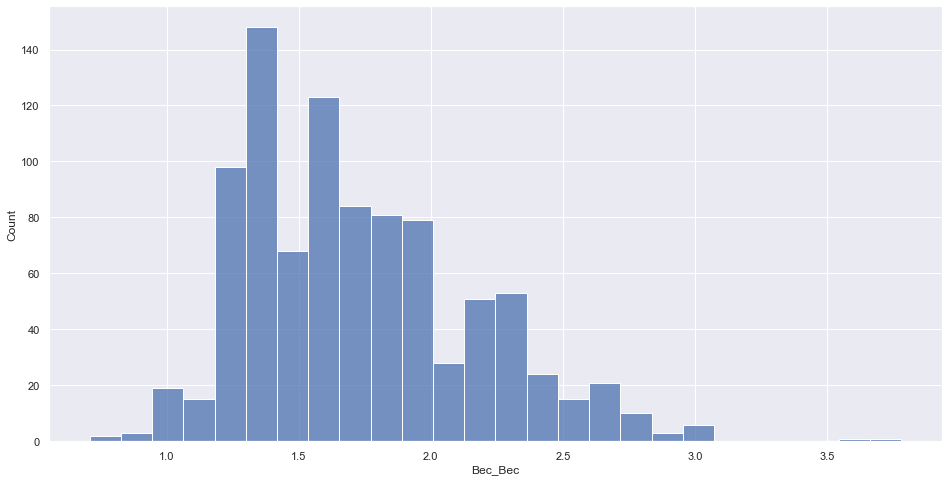

In [25]:
sns.histplot(x=df["Вес_Вес"]);

In [27]:
useful_features.update(["Вес_Вес"])

# Колонки 51-80

In [28]:
current_features = df.columns[50:80]

In [29]:
df[current_features]

,Процессор_Модель процессора,Процессор_Тип процессора,Процессор_Частота процессора,Процессор_Максимальная тактовая частота,Процессор_Производитель процессора,Видеокарта_Объем видеопамяти,Оперативная память_Количество слотов памяти,Передача данных_Поддержка Gigabit LAN,Интерфейсы_Порт USB 3.2 тип C,Интерфейсы_LAN разъем (RJ45),...,Интерфейсы_Порт USB Type-С,Жесткий диск_Объем eMMC,Операционная система_Версия ОС,Экран_Дополнительный экран,Привод_Привод (ODD),Интерфейсы_Порт USB 2.0 тип C,Интерфейсы_Разъем micro HDMI,Экран_Глянцевый экран,Ключевые преимущества_Пользователи оценят,Передача данных_Технология NFC
30062056,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,None,None,None,None,NaN,NaN,None,None,None
30065211,12450H,Core i5,2.0,4.4,Intel,4.0,2.0,Да,1.0,1.0,...,NaN,None,None,None,None,NaN,NaN,None,None,None
30056687,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,1.0,None,None,None,None,NaN,NaN,None,None,None
30064594,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,None,None,None,None,NaN,NaN,None,None,None
30061606,11400H,Core i5,2.7,4.5,Intel,6.0,2.0,Да,1.0,1.0,...,NaN,None,None,None,None,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400027919,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,None,None,None,None,NaN,NaN,None,None,None
4183550,None,None,NaN,NaN,None,NaN,1.0,None,NaN,NaN,...,NaN,128 ГБ,10,None,None,NaN,NaN,None,None,None
400027896,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,None,None,None,None,NaN,NaN,None,None,None
400029644,None,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,...,NaN,None,None,None,None,NaN,NaN,None,None,None


In [30]:
df[current_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Процессор_Модель процессора                    156 non-null    object 
 1   Процессор_Тип процессора                       156 non-null    object 
 2   Процессор_Частота процессора                   155 non-null    float64
 3   Процессор_Максимальная тактовая частота        215 non-null    float64
 4   Процессор_Производитель процессора             156 non-null    object 
 5   Видеокарта_Объем видеопамяти                   188 non-null    float64
 6   Оперативная память_Количество слотов памяти    313 non-null    float64
 7   Передача данных_Поддержка Gigabit LAN          256 non-null    object 
 8   Интерфейсы_Порт USB 3.2 тип C                  199 non-null    float64
 9   Интерфейсы_LAN разъем (RJ45)               

# Колонки 81-110

In [31]:
current_features = df.columns[80:110]

In [32]:
df[current_features]

,Интерфейсы_Вход HDMI,Передача данных_Поддержка 10/100 FastEthernet,Интерфейсы_Количество портов USB 3.1 тип C,Экран_Сенсорный экран,Жесткий диск_Объем HDD,Интерфейсы_DisplayPort,Процессор_Графический процессор ядер,Интерфейсы_Порт Thunderbolt,Интерфейсы_Порт USB 4 тип C / Thunderbolt 4,Комплектация_Чехол,...,Жесткий диск_Объем гибридного SSHD,Передача данных_Модуль 3G,Передача данных_Поддержка 4G LTE,Передача данных_Поддержка 5G,Интерфейсы_Разъем для микрофона 3.5 мм,Интерфейсы_Выход D-Sub видео,Процессор_Платформа Intel Evo,basePrice,basePromoPrice,salePrice
30062056,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,69999,NaN,69999
30065211,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,104999,NaN,104999
30056687,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,59999,NaN,59999
30064594,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,139999,NaN,139999
30061606,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,129999,109999.0,109999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400027919,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,135990,NaN,135990
4183550,NaN,None,NaN,None,None,NaN,NaN,NaN,NaN,None,...,NaN,None,None,None,NaN,NaN,None,27990,NaN,27990
400027896,NaN,None,NaN,None,None,NaN,NaN,NaN,3.0,None,...,NaN,None,None,None,NaN,NaN,None,184990,NaN,184990
400029644,NaN,None,NaN,None,None,NaN,NaN,NaN,3.0,None,...,NaN,None,None,None,NaN,NaN,None,184990,NaN,184990


In [33]:
df[current_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Интерфейсы_Вход HDMI                            122 non-null    float64
 1   Передача данных_Поддержка 10/100 FastEthernet   13 non-null     object 
 2   Интерфейсы_Количество портов USB 3.1 тип C      110 non-null    float64
 3   Экран_Сенсорный экран                           74 non-null     object 
 4   Жесткий диск_Объем HDD                          61 non-null     object 
 5   Интерфейсы_DisplayPort                          29 non-null     float64
 6   Процессор_Графический процессор ядер            78 non-null     float64
 7   Интерфейсы_Порт Thunderbolt                     28 non-null     float64
 8   Интерфейсы_Порт USB 4 тип C / Thunderbolt 4     82 non-null     float64
 9   Комплектация_Чехол              

## Интерфейсы_LAN разъем (RJ45)

In [36]:
df["Интерфейсы_LAN разъем (RJ45)"].info()

<class 'pandas.core.series.Series'>
Int64Index: 933 entries, 30062056 to 4129209
Series name: Интерфейсы_LAN разъем (RJ45)
Non-Null Count  Dtype  
--------------  -----  
285 non-null    float64
dtypes: float64(1)
memory usage: 14.6 KB


In [38]:
df["Интерфейсы_LAN разъем (RJ45)"].value_counts()

1.0    285
Name: Интерфейсы_LAN разъем (RJ45), dtype: int64

In [39]:
df["Интерфейсы_LAN разъем (RJ45)"].fillna(0).value_counts()

0.0    648
1.0    285
Name: Интерфейсы_LAN разъем (RJ45), dtype: int64

In [40]:
df["Интерфейсы_LAN разъем (RJ45)"].fillna(0, inplace=True)

In [41]:
useful_features.update(["Интерфейсы_LAN разъем (RJ45)"])

# Ну и итог

In [42]:
useful_features

{'Вес_Вес', 'Интерфейсы_LAN разъем (RJ45)'}

In [46]:
def convert_volume_to_number(val):
    if not val:
        return 0
    num, item = val.split()
    num = int(num)
    if item.lower() == "тб":
        return 1024 * num
    else:
        return num
    
def prepare_df_2(df_origin):
    df = df_origin.copy()
    useful_features = set()
    
    df["basePriceLog"] = np.log1p(df.basePrice)
    
    useful_features.update(["basePriceLog"])
    
    df["Процессор_Процессор_crop"] = df["Процессор_Процессор"].apply(lambda x:" ".join(x.split()[:2]))
    df.loc[((df["Серия модели_Серия"] == "MacBook Pro") | ((df["Серия модели_Серия"] == "MacBook Pro Touch Bar"))) & (df["Процессор_Количество ядер"].isna()), "Процессор_Количество ядер"] = 10

    useful_features.update([
        "brand_name",
        "Заводские данные_Гарантия",
        "Заводские данные_Страна",
        "Операционная система_Операционная система",
        "Процессор_Процессор_crop",
        "Процессор_Количество ядер"
    ])
    
    df["Видеокарта_Графический контроллер_crop"] = df["Видеокарта_Графический контроллер"].fillna("").apply(lambda x:" ".join(x.split()[:2]))
    df["Жесткий диск_Объем SSD_num"] = df["Жесткий диск_Объем SSD"].apply(convert_volume_to_number)
    df["Экран_Диагональ экрана_num"] = df["Экран_Диагональ экрана"].fillna("").apply(lambda x: 15.6 if x == "" else float(x.split('"')[0]))
    
    useful_features.update([
        "Видеокарта_Графический контроллер_crop",
        "Видеокарта_Производитель видеопроцессора",
        "Экран_Диагональ экрана_num",
        "Оперативная память_Оперативная память (RAM)",
        "Жесткий диск_Объем SSD_num",
        "Экран_Частота обновления",
        "Оперативная память_Частота памяти"
    ])

    df["Безопасность_Датчик отпечатков пальцев_crop"] = ~df["Безопасность_Датчик отпечатков пальцев"].isna()
    df["Корпус_Материал корпуса_металл"] = df["Корпус_Материал корпуса"].str.contains("алюмин|металл|сплав|магний")
    df["Корпус_Материал корпуса_пластик"] = df["Корпус_Материал корпуса"].str.contains("пластик|углерод|поликарб")
    
    useful_features.update([
        "Безопасность_Датчик отпечатков пальцев_crop",
        "Корпус_Материал корпуса_металл",
        "Корпус_Материал корпуса_пластик"
    ])
    
    df["Интерфейсы_LAN разъем (RJ45)"].fillna(0, inplace=True)
    df["Вес_Вес"].fillna(df["Вес_Вес"].mean(), inplace=True)
    
    useful_features.update([
        "Интерфейсы_LAN разъем (RJ45)",
        "Вес_Вес"
    ])
        
    return df[list(useful_features)]
    

In [47]:
prepare_df_2(df)

,Оперативная память_Оперативная память (RAM),Корпус_Материал корпуса_металл,Операционная система_Операционная система,Заводские данные_Гарантия,Безопасность_Датчик отпечатков пальцев_crop,Корпус_Материал корпуса_пластик,Видеокарта_Графический контроллер_crop,Вес_Вес,Процессор_Процессор_crop,Оперативная память_Частота памяти,Процессор_Количество ядер,brand_name,Видеокарта_Производитель видеопроцессора,Интерфейсы_LAN разъем (RJ45),basePriceLog,Жесткий диск_Объем SSD_num,Заводские данные_Страна,Экран_Частота обновления,Экран_Диагональ экрана_num
30062056,16,True,Windows 10 Домашняя 64,1 год,True,False,Intel UHD,1.729348,Intel Core,2666.0,4.0,Honor,Intel,0.0,11.156251,512,Китай,60.0,15.6
30065211,16,False,Windows 11 Pro 64,1 год,False,True,GeForce RTX,2.500000,Intel Core,3200.0,8.0,Thunderobot,NVIDIA,1.0,11.561716,512,Китай,144.0,17.3
30056687,8,True,Windows 10 Домашняя 64,1 год,True,False,Intel UHD,1.560000,Intel Core,2400.0,4.0,Honor,Intel,0.0,11.002100,512,Китай,60.0,15.6
30064594,8,True,macOS,1 год,False,False,,1.400000,Apple M2,NaN,8.0,Apple,None,0.0,11.849398,256,Китай,NaN,15.6
30061606,16,True,Windows 11 Домашняя 64,1 год,False,True,GeForce RTX,2.600000,Intel Core,3200.0,6.0,MSI,NVIDIA,1.0,11.775290,512,Китай,144.0,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400027919,8,True,macOS Monterey,1 год,True,False,интегрированная,1.240000,Apple M2,NaN,8.0,Apple,None,0.0,11.820344,256,Китай,60.0,15.6
4183550,8,False,Windows 10 Домашняя,1 год,False,True,Intel HD,1.900000,Intel Celeron,NaN,4.0,Echips,Intel,0.0,10.239638,240,Китай,60.0,15.6
400027896,16,True,macOS Monterey,1 год,True,False,интегрированная,1.610000,Apple M1,NaN,10.0,Apple,None,0.0,12.128062,512,Китай,60.0,15.6
400029644,16,True,macOS Monterey,1 год,True,False,интегрированная,1.610000,Apple M1,NaN,10.0,Apple,None,0.0,12.128062,512,Китай,60.0,15.6


In [48]:
prepare_df_2(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Оперативная память_Оперативная память (RAM)  933 non-null    int64  
 1   Корпус_Материал корпуса_металл               930 non-null    object 
 2   Операционная система_Операционная система    919 non-null    object 
 3   Заводские данные_Гарантия                    933 non-null    object 
 4   Безопасность_Датчик отпечатков пальцев_crop  933 non-null    bool   
 5   Корпус_Материал корпуса_пластик              930 non-null    object 
 6   Видеокарта_Графический контроллер_crop       933 non-null    object 
 7   Вес_Вес                                      933 non-null    float64
 8   Процессор_Процессор_crop                     933 non-null    object 
 9   Оперативная память_Частота памяти            740 non-null    floa

# Нужно еще заполнить оставшиеся пропуски

In [49]:
df_ = prepare_df_2(df)

In [58]:
df_["Корпус_Материал корпуса_металл"].fillna(False, inplace=True)
df_["Корпус_Материал корпуса_пластик"].fillna(False, inplace=True)

In [61]:
df_["Оперативная память_Частота памяти"].value_counts()

3200.0    328
2400.0    130
2666.0     78
2133.0     51
2933.0     36
1600.0     30
4266.0     30
4267.0     14
1333.0     11
1866.0     11
3733.0     10
4800.0      5
5200.0      4
3600.0      1
3.0         1
Name: Оперативная память_Частота памяти, dtype: int64

<AxesSubplot:xlabel='Оперативная память_Частота памяти', ylabel='Count'>

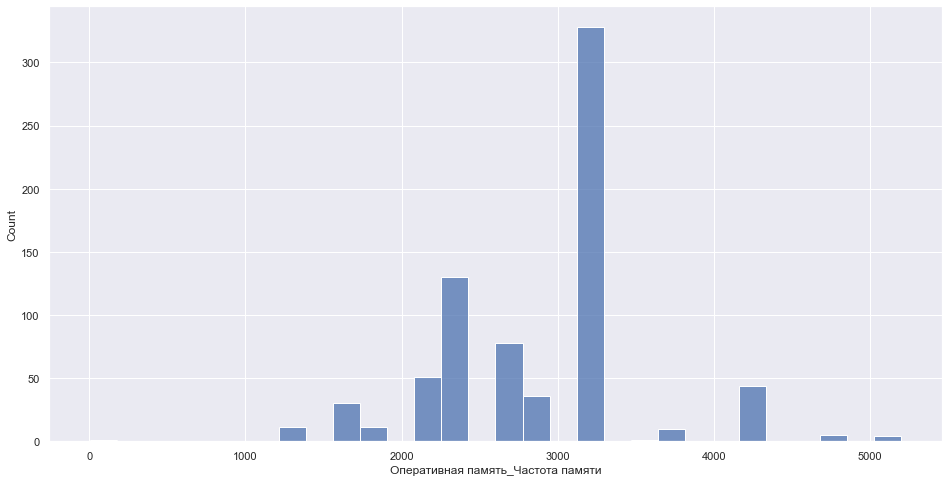

In [62]:
sns.histplot(df_["Оперативная память_Частота памяти"])

In [67]:
df_["Оперативная память_Частота памяти"].fillna(3200, inplace=True)

In [70]:
df_.loc[df_["Оперативная память_Частота памяти"] == 3, "Оперативная память_Частота памяти"] = 3200

In [71]:
df_["Оперативная память_Частота памяти"].value_counts()

3200.0    522
2400.0    130
2666.0     78
2133.0     51
2933.0     36
1600.0     30
4266.0     30
4267.0     14
1333.0     11
1866.0     11
3733.0     10
4800.0      5
5200.0      4
3600.0      1
Name: Оперативная память_Частота памяти, dtype: int64

In [72]:
df_["Экран_Частота обновления"].value_counts()

60.0     363
144.0     73
120.0     59
165.0     17
90.0      13
50.0       5
240.0      4
300.0      3
360.0      1
Name: Экран_Частота обновления, dtype: int64

In [73]:
df_["Экран_Частота обновления"].fillna(60, inplace=True)

In [76]:
df_["Операционная система_Операционная система"].fillna("Unknown", inplace=True)
df_["Видеокарта_Производитель видеопроцессора"].fillna("Unknown", inplace=True)

In [77]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Оперативная память_Оперативная память (RAM)  933 non-null    int64  
 1   Корпус_Материал корпуса_металл               933 non-null    bool   
 2   Операционная система_Операционная система    933 non-null    object 
 3   Заводские данные_Гарантия                    933 non-null    object 
 4   Безопасность_Датчик отпечатков пальцев_crop  933 non-null    bool   
 5   Корпус_Материал корпуса_пластик              933 non-null    bool   
 6   Видеокарта_Графический контроллер_crop       933 non-null    object 
 7   Вес_Вес                                      933 non-null    float64
 8   Процессор_Процессор_crop                     933 non-null    object 
 9   Оперативная память_Частота памяти            933 non-null    floa

In [84]:
def prepare_df_3(df_origin): 
    df = df_origin.copy()
    useful_features = set()
    
    df["basePriceLog"] = np.log1p(df.basePrice)
    
    useful_features.update(["basePriceLog"])
    
    df["Процессор_Процессор_crop"] = df["Процессор_Процессор"].apply(lambda x:" ".join(x.split()[:2]))
    df.loc[((df["Серия модели_Серия"] == "MacBook Pro") | ((df["Серия модели_Серия"] == "MacBook Pro Touch Bar"))) & (df["Процессор_Количество ядер"].isna()), "Процессор_Количество ядер"] = 10

    useful_features.update([
        "brand_name",
        "Заводские данные_Гарантия",
        "Заводские данные_Страна",
        "Операционная система_Операционная система",
        "Процессор_Процессор_crop",
        "Процессор_Количество ядер"
    ])
    
    df["Видеокарта_Графический контроллер_crop"] = df["Видеокарта_Графический контроллер"].fillna("").apply(lambda x:" ".join(x.split()[:2]))
    df["Жесткий диск_Объем SSD_num"] = df["Жесткий диск_Объем SSD"].apply(convert_volume_to_number)
    df["Экран_Диагональ экрана_num"] = df["Экран_Диагональ экрана"].fillna("").apply(lambda x: 15.6 if x == "" else float(x.split('"')[0]))
    
    useful_features.update([
        "Видеокарта_Графический контроллер_crop",
        "Видеокарта_Производитель видеопроцессора",
        "Экран_Диагональ экрана_num",
        "Оперативная память_Оперативная память (RAM)",
        "Жесткий диск_Объем SSD_num",
        "Экран_Частота обновления",
        "Оперативная память_Частота памяти"
    ])

    df["Безопасность_Датчик отпечатков пальцев_crop"] = ~df["Безопасность_Датчик отпечатков пальцев"].isna()
    df["Корпус_Материал корпуса_металл"] = df["Корпус_Материал корпуса"].str.contains("алюмин|металл|сплав|магний")
    df["Корпус_Материал корпуса_пластик"] = df["Корпус_Материал корпуса"].str.contains("пластик|углерод|поликарб")
    
    useful_features.update([
        "Безопасность_Датчик отпечатков пальцев_crop",
        "Корпус_Материал корпуса_металл",
        "Корпус_Материал корпуса_пластик"
    ])
    
    df["Интерфейсы_LAN разъем (RJ45)"].fillna(0, inplace=True)
    df["Вес_Вес"].fillna(df["Вес_Вес"].mean(), inplace=True)
    
    useful_features.update([
        "Интерфейсы_LAN разъем (RJ45)",
        "Вес_Вес"
    ])
        
    df["Корпус_Материал корпуса_металл"].fillna(False, inplace=True)
    df["Корпус_Материал корпуса_пластик"].fillna(False, inplace=True)
    df["Оперативная память_Частота памяти"].fillna(3200, inplace=True)
    df.loc[df_["Оперативная память_Частота памяти"] < 100, "Оперативная память_Частота памяти"] = 3200
    
    df["Экран_Частота обновления"].fillna(60, inplace=True)
    df["Операционная система_Операционная система"].fillna("не установлена", inplace=True)
    df["Видеокарта_Производитель видеопроцессора"].fillna("Unknown", inplace=True)
        
    return df[list(useful_features)]
    

In [88]:
prepare_df_3(df).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 30062056 to 4129209
Data columns (total 19 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Оперативная память_Оперативная память (RAM)  933 non-null    int64  
 1   Корпус_Материал корпуса_металл               933 non-null    bool   
 2   Операционная система_Операционная система    933 non-null    object 
 3   Заводские данные_Гарантия                    933 non-null    object 
 4   Безопасность_Датчик отпечатков пальцев_crop  933 non-null    bool   
 5   Корпус_Материал корпуса_пластик              933 non-null    bool   
 6   Видеокарта_Графический контроллер_crop       933 non-null    object 
 7   Вес_Вес                                      933 non-null    float64
 8   Процессор_Процессор_crop                     933 non-null    object 
 9   Оперативная память_Частота памяти            933 non-null    floa

In [91]:
prepare_df_3(df).select_dtypes('object')

,Операционная система_Операционная система,Заводские данные_Гарантия,Видеокарта_Графический контроллер_crop,Процессор_Процессор_crop,brand_name,Видеокарта_Производитель видеопроцессора,Заводские данные_Страна
30062056,Windows 10 Домашняя 64,1 год,Intel UHD,Intel Core,Honor,Intel,Китай
30065211,Windows 11 Pro 64,1 год,GeForce RTX,Intel Core,Thunderobot,NVIDIA,Китай
30056687,Windows 10 Домашняя 64,1 год,Intel UHD,Intel Core,Honor,Intel,Китай
30064594,macOS,1 год,,Apple M2,Apple,Unknown,Китай
30061606,Windows 11 Домашняя 64,1 год,GeForce RTX,Intel Core,MSI,NVIDIA,Китай
...,...,...,...,...,...,...,...
400027919,macOS Monterey,1 год,интегрированная,Apple M2,Apple,Unknown,Китай
4183550,Windows 10 Домашняя,1 год,Intel HD,Intel Celeron,Echips,Intel,Китай
400027896,macOS Monterey,1 год,интегрированная,Apple M1,Apple,Unknown,Китай
400029644,macOS Monterey,1 год,интегрированная,Apple M1,Apple,Unknown,Китай


In [93]:
df_ = prepare_df_3(df)

In [95]:
df_["Операционная система_Операционная система"].value_counts()

Windows 10 Домашняя 64         186
macOS                          132
Windows 10 Домашняя             95
Windows 11 Домашняя 64          91
не установлена                  87
Windows 11 Домашняя             77
DOS                             49
macOS Monterey                  41
Windows 10 Pro 64               40
Windows 10 Pro                  37
Windows 10                      27
Linux                           21
Windows 11                      14
Unknown                         14
Windows 10 Домашняя S-режим     10
Windows 11 Pro 64                4
Windows 11 Домашняя S-режим      3
Windows 11 Pro                   2
Eshell                           2
Windows                          1
Name: Операционная система_Операционная система, dtype: int64